# Rocky Wu - jywu3

As usual, import the packages we want

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import bqplot
import matplotlib.colors as mpl_colors

Set the seed for the down sampling to make sure we could reproduce the results

In [2]:
np.random.seed(2022)

### Explore the dataset:

The name of the dataset: Yellow Taxi trip data 2021-01 in NYC

We can obtain the dataset at the TLC official site. [link towards the dataset webpage](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

The link towards the dataset:
https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-01.csv

Preferably, download the dataset first as the dataset is fairly large, 126MB. 

No identification of the license, so I am assuming we can play around with it. We do have an user guide of the dataset, but not much was mentioned on what we can do with the data. Link to the user guide: https://www1.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf

The dictionary of the dataset:https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf



#### Columns explained:
VendorID - A code indicating the TPEP provider that provided the record. [1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.]

tpep_pickup_datetime - The date and time when the meter was engaged.

tpep_dropoff_datetime - The date and time when the meter was disengaged.

Passenger_count - The number of passengers in the vehicle. This is a driver-entered value.

Trip_distance - The elapsed trip distance in miles reported by the taximeter.

PULocationID - TLC Taxi Zone in which the taximeter was engaged

DOLocationID - TLC Taxi Zone in which the taximeter was disengaged

RateCodeID - The final rate code in effect at the end of the trip.
[1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride]

Store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
[Y= store and forward trip, N= not a store and forward trip]

Payment_type - A numeric code signifying how the passenger paid for the trip.
[1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip]

Fare_amount - The time-and-distance fare calculated by the meter.

Extra - Miscellaneous extras and surcharges. Currently, this only includes the \\$0.50 and \\$1 rush hour and overnight charges.

MTA_tax - \\$0.50 MTA tax that is automatically triggered based on the metered rate in use.

Improvement_surcharge - \\$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

Tip_amount - This field is automatically populated for credit card tips. Cash tips are not included.

Tolls_amount - Total amount of all tolls paid in trip.

Total_amount - The total amount charged to passengers. Does not include cash tips.

In [3]:
# Original import using the link
# data = pd.read_csv("https://s3.amazonaws.com/
# nyc-tlc/trip+data/yellow_tripdata_2021-01.csv")
data = pd.read_csv("../data/yellow_tripdata_2021-01.csv", 
                   low_memory=False)

There was a warning indicating the dtype conflicts in some of the columns in the dataset. Will deal with the warning in the later stage. Escaping the warning by setting low_memory = False

Take a look of the dataset

In [4]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5


In total 1369765 rows inside the dataset, indeed a large one.

In [5]:
dataLength = len(data)
dataLength

1369765

How many columns:

In [6]:
len(data.columns)

18

Take a look on the columns

In [7]:
for c in data.columns:
    print(c)

VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
RatecodeID
store_and_fwd_flag
PULocationID
DOLocationID
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge


We will first downsample the dataset, else my computer could not handle the dataset

In [8]:
np.random.seed(0)
nsamples = len(data) // 25
downSampleMask = np.random.choice(range(len(data)-1), 
                                  nsamples, replace=False)
downSampleMask, len(downSampleMask)

(array([1215088,  612594,  259095, ...,  626503, 1036304, 1184626]), 27395)

In [9]:
data = data.loc[downSampleMask]
len(data)

27395

In [10]:
dataLength = len(data)
dataLength

27395

In [11]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1215088,1.0,2021-01-30 12:21:33,2021-01-30 12:26:14,0.0,1.00,1.0,N,79,107,2.0,5.5,2.5,0.5,0.00,0.0,0.3,8.80,2.5
612594,2.0,2021-01-16 12:23:31,2021-01-16 12:29:11,1.0,1.19,1.0,N,164,68,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5
259095,2.0,2021-01-08 07:07:00,2021-01-08 07:10:36,5.0,1.07,1.0,N,114,90,1.0,5.5,0.0,0.5,1.76,0.0,0.3,10.56,2.5
1049052,2.0,2021-01-26 19:17:16,2021-01-26 19:33:39,3.0,2.92,1.0,N,140,238,1.0,13.0,1.0,0.5,2.00,0.0,0.3,19.30,2.5
220625,2.0,2021-01-07 10:13:49,2021-01-07 10:16:42,1.0,0.74,1.0,N,246,68,1.0,4.5,0.0,0.5,0.00,0.0,0.3,7.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166086,1.0,2021-01-06 07:30:07,2021-01-06 07:38:31,1.0,2.20,1.0,N,137,125,2.0,9.0,2.5,0.5,0.00,0.0,0.3,12.30,2.5
1019375,2.0,2021-01-26 10:51:07,2021-01-26 10:57:13,1.0,0.50,1.0,N,261,231,2.0,5.5,0.0,0.5,0.00,0.0,0.3,8.80,2.5
626503,1.0,2021-01-16 17:31:50,2021-01-16 17:38:11,2.0,1.30,1.0,N,88,45,1.0,6.5,2.5,0.5,4.00,0.0,0.3,13.80,2.5
1036304,2.0,2021-01-26 15:59:10,2021-01-26 16:03:31,1.0,0.70,1.0,N,140,262,1.0,5.0,0.0,0.5,1.66,0.0,0.3,9.96,2.5


After downsampling the dataset, we can use the pd.isnull to determine if there were nan values inside the columns

Print out the if nan values exists in the column

In [12]:
for c in data.columns:
    if pd.isnull(data[c].unique()).any():
        print(c)
    # print(c, pd.isnull(data[c].unique()).any())

VendorID
passenger_count
RatecodeID
store_and_fwd_flag
payment_type


From the output above, we now know that there were some nan values in VendorID, passenger_count, RatecodeID, payment_type. I decide to drop all the nan values in the dataset so that we would not be impacted by the nan values when calculating numeric values. The procedure will be in the following part

### Explore the values inside each column

The below prints out if there were any nan values inside each column, before printing out the nan values, we would need to convert some columns' datatype

In [13]:
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

From the above, we can tell that the two datetime columns and the flag column need some cleaning. We would convert the object in datetime columns into datetime objectsm and the flag should be converted to string/text data type. 

The two datetime columns first:

In [14]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [15]:
data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [16]:
data['tpep_pickup_datetime'].head(), data['tpep_dropoff_datetime'].head()

(1215088   2021-01-30 12:21:33
 612594    2021-01-16 12:23:31
 259095    2021-01-08 07:07:00
 1049052   2021-01-26 19:17:16
 220625    2021-01-07 10:13:49
 Name: tpep_pickup_datetime, dtype: datetime64[ns],
 1215088   2021-01-30 12:26:14
 612594    2021-01-16 12:29:11
 259095    2021-01-08 07:10:36
 1049052   2021-01-26 19:33:39
 220625    2021-01-07 10:16:42
 Name: tpep_dropoff_datetime, dtype: datetime64[ns])

Good, now we have changed the datatype of the dates into the correct type, lets see if there are any nan or strange entries in the column

In [17]:
pd.to_datetime(data['tpep_pickup_datetime']).dt.date.unique()

array([datetime.date(2021, 1, 30), datetime.date(2021, 1, 16),
       datetime.date(2021, 1, 8), datetime.date(2021, 1, 26),
       datetime.date(2021, 1, 7), datetime.date(2021, 1, 21),
       datetime.date(2021, 1, 18), datetime.date(2021, 1, 22),
       datetime.date(2021, 1, 11), datetime.date(2021, 1, 28),
       datetime.date(2021, 1, 9), datetime.date(2021, 1, 17),
       datetime.date(2021, 1, 6), datetime.date(2021, 1, 12),
       datetime.date(2021, 1, 29), datetime.date(2021, 1, 14),
       datetime.date(2021, 1, 4), datetime.date(2021, 1, 15),
       datetime.date(2021, 1, 24), datetime.date(2021, 1, 25),
       datetime.date(2021, 1, 23), datetime.date(2021, 1, 1),
       datetime.date(2021, 1, 31), datetime.date(2021, 1, 10),
       datetime.date(2021, 1, 5), datetime.date(2021, 1, 2),
       datetime.date(2021, 1, 3), datetime.date(2021, 1, 27),
       datetime.date(2021, 1, 13), datetime.date(2021, 1, 20),
       datetime.date(2021, 1, 19), datetime.date(2020, 12, 31)],

Notice that we have three errorous data in the dataset, some indicated 2008/12/31, some indicated 2020/12/31 and the rest indicating 2009/12/31. We should remove these entries.

In [18]:
data[(data['tpep_pickup_datetime'] <= "2020-12-31 23:59:59") 
     | (data['tpep_pickup_datetime'] > "2021-01-31 23:59:59")]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3474,2.0,2020-12-31 23:06:12,2020-12-31 23:18:39,1.0,7.08,1.0,N,42,137,2.0,21.0,0.5,0.5,0.00,0.0,0.3,24.80,2.5
2846,2.0,2020-12-31 18:25:31,2020-12-31 18:35:41,1.0,2.72,1.0,N,142,233,1.0,10.5,0.5,0.5,2.86,0.0,0.3,17.16,2.5


In [19]:
dropIndex = list(data[(data['tpep_pickup_datetime'] <= "2020-12-31 23:59:59") | (data['tpep_pickup_datetime'] > "2021-01-31 23:59:59")].index)

In [20]:
dropIndex

[3474, 2846]

In [21]:
data.drop([i for i in dropIndex], inplace=True)

In [22]:
pd.to_datetime(data['tpep_pickup_datetime']).dt.date.unique()

array([datetime.date(2021, 1, 30), datetime.date(2021, 1, 16),
       datetime.date(2021, 1, 8), datetime.date(2021, 1, 26),
       datetime.date(2021, 1, 7), datetime.date(2021, 1, 21),
       datetime.date(2021, 1, 18), datetime.date(2021, 1, 22),
       datetime.date(2021, 1, 11), datetime.date(2021, 1, 28),
       datetime.date(2021, 1, 9), datetime.date(2021, 1, 17),
       datetime.date(2021, 1, 6), datetime.date(2021, 1, 12),
       datetime.date(2021, 1, 29), datetime.date(2021, 1, 14),
       datetime.date(2021, 1, 4), datetime.date(2021, 1, 15),
       datetime.date(2021, 1, 24), datetime.date(2021, 1, 25),
       datetime.date(2021, 1, 23), datetime.date(2021, 1, 1),
       datetime.date(2021, 1, 31), datetime.date(2021, 1, 10),
       datetime.date(2021, 1, 5), datetime.date(2021, 1, 2),
       datetime.date(2021, 1, 3), datetime.date(2021, 1, 27),
       datetime.date(2021, 1, 13), datetime.date(2021, 1, 20),
       datetime.date(2021, 1, 19)], dtype=object)

Good, the errorous data were all dropped. Check if the length of the dataset is correct

In [23]:
dataLength - len(data) == len(dropIndex)

True

Great, now we can create a pickup_date that converts the pickup_datetime column into date column

In [24]:
# Create the count of each date in the data
data.groupby(pd.to_datetime(data['tpep_pickup_datetime']).dt.date).size()

tpep_pickup_datetime
2021-01-01     470
2021-01-02     693
2021-01-03     508
2021-01-04     844
2021-01-05     913
2021-01-06     964
2021-01-07    1050
2021-01-08     994
2021-01-09     785
2021-01-10     603
2021-01-11     903
2021-01-12    1033
2021-01-13     999
2021-01-14    1024
2021-01-15    1077
2021-01-16     785
2021-01-17     682
2021-01-18     770
2021-01-19    1034
2021-01-20    1000
2021-01-21    1113
2021-01-22    1076
2021-01-23     858
2021-01-24     597
2021-01-25     965
2021-01-26     955
2021-01-27    1096
2021-01-28    1045
2021-01-29    1112
2021-01-30     818
2021-01-31     627
dtype: int64

In [25]:
data['pickup_date'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.date
data['pickup_date'] = pd.to_datetime(data['pickup_date'])
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
1215088,1.0,2021-01-30 12:21:33,2021-01-30 12:26:14,0.0,1.00,1.0,N,79,107,2.0,5.5,2.5,0.5,0.00,0.0,0.3,8.80,2.5,2021-01-30
612594,2.0,2021-01-16 12:23:31,2021-01-16 12:29:11,1.0,1.19,1.0,N,164,68,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5,2021-01-16
259095,2.0,2021-01-08 07:07:00,2021-01-08 07:10:36,5.0,1.07,1.0,N,114,90,1.0,5.5,0.0,0.5,1.76,0.0,0.3,10.56,2.5,2021-01-08
1049052,2.0,2021-01-26 19:17:16,2021-01-26 19:33:39,3.0,2.92,1.0,N,140,238,1.0,13.0,1.0,0.5,2.00,0.0,0.3,19.30,2.5,2021-01-26
220625,2.0,2021-01-07 10:13:49,2021-01-07 10:16:42,1.0,0.74,1.0,N,246,68,1.0,4.5,0.0,0.5,0.00,0.0,0.3,7.80,2.5,2021-01-07


Check if we accidentally create some errorous data

In [26]:
data['pickup_date'].unique()

array(['2021-01-30T00:00:00.000000000', '2021-01-16T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-26T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-22T00:00:00.000000000',
       '2021-01-11T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-01-09T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-12T00:00:00.000000000',
       '2021-01-29T00:00:00.000000000', '2021-01-14T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-24T00:00:00.000000000', '2021-01-25T00:00:00.000000000',
       '2021-01-23T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-31T00:00:00.000000000', '2021-01-10T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-27

Now the flag one is bit complicated, we would have to deal with nan values...

Actually, we would not need to convert the flag columns, as we still can filter out the results using string. But we would still need to cope with the nan values in this column.

In [27]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype(str)

In [28]:
data[data['store_and_fwd_flag'] == 'N'].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
1215088,1.0,2021-01-30 12:21:33,2021-01-30 12:26:14,0.0,1.00,1.0,N,79,107,2.0,5.5,2.5,0.5,0.00,0.0,0.3,8.80,2.5,2021-01-30
612594,2.0,2021-01-16 12:23:31,2021-01-16 12:29:11,1.0,1.19,1.0,N,164,68,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5,2021-01-16
259095,2.0,2021-01-08 07:07:00,2021-01-08 07:10:36,5.0,1.07,1.0,N,114,90,1.0,5.5,0.0,0.5,1.76,0.0,0.3,10.56,2.5,2021-01-08
1049052,2.0,2021-01-26 19:17:16,2021-01-26 19:33:39,3.0,2.92,1.0,N,140,238,1.0,13.0,1.0,0.5,2.00,0.0,0.3,19.30,2.5,2021-01-26
220625,2.0,2021-01-07 10:13:49,2021-01-07 10:16:42,1.0,0.74,1.0,N,246,68,1.0,4.5,0.0,0.5,0.00,0.0,0.3,7.80,2.5,2021-01-07


Now we would look at the numeric columns that we are interested in

Take a look at the total amount column

In [29]:
data['total_amount'].shape, data['total_amount'].sum()

((27393,), 476320.55)

Lets check the values inside total amount

In [30]:
data['total_amount'].min(), data['total_amount'].max()

(-65.8, 267.65)

OK, Now we have negative values in total amount, we would need to remove these data values

In [31]:
data[(data['total_amount'] <= 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
791170,2.0,2021-01-20 19:56:42,2021-01-20 19:56:49,1.0,0.01,1.0,N,236,236,3.0,-2.50,-0.5,-0.5,0.0,0.0,-0.3,-6.30,-2.5,2021-01-20
1240300,2.0,2021-01-30 22:23:51,2021-01-30 22:28:31,1.0,0.87,1.0,N,164,48,3.0,-5.50,-0.5,-0.5,0.0,0.0,-0.3,-9.30,-2.5,2021-01-30
954475,2.0,2021-01-24 16:36:04,2021-01-24 16:36:10,1.0,0.00,5.0,N,193,193,4.0,-0.05,0.0,0.0,0.0,0.0,-0.3,-0.35,0.0,2021-01-24
675200,2.0,2021-01-18 10:46:18,2021-01-18 10:48:23,1.0,0.50,1.0,N,90,246,3.0,-3.50,0.0,-0.5,0.0,0.0,-0.3,-6.80,-2.5,2021-01-18
1154872,2.0,2021-01-29 02:00:19,2021-01-29 02:19:35,1.0,8.64,1.0,N,147,220,2.0,-27.00,-0.5,-0.5,0.0,0.0,-0.3,-28.30,0.0,2021-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136820,2.0,2021-01-28 16:37:52,2021-01-28 16:57:05,1.0,2.09,1.0,N,236,41,4.0,-13.50,-1.0,-0.5,0.0,0.0,-0.3,-17.80,-2.5,2021-01-28
1762,2.0,2021-01-01 01:24:49,2021-01-01 01:38:18,3.0,5.51,1.0,N,262,79,4.0,-18.00,-0.5,-0.5,0.0,0.0,-0.3,-21.80,-2.5,2021-01-01
283526,2.0,2021-01-08 15:12:04,2021-01-08 15:12:30,1.0,0.00,1.0,N,246,246,4.0,-2.50,0.0,-0.5,0.0,0.0,-0.3,-5.80,-2.5,2021-01-08
728730,2.0,2021-01-19 14:42:27,2021-01-19 14:53:39,1.0,1.26,1.0,N,125,148,4.0,-8.50,0.0,-0.5,0.0,0.0,-0.3,-11.80,-2.5,2021-01-19


In [32]:
dropIndex = list(data[(data['total_amount'] <= 0)].index)
dropIndex[:5], len(dropIndex)

([791170, 1240300, 954475, 675200, 1154872], 137)

In [33]:
data.drop([i for i in dropIndex], inplace=True)

In [34]:
data['total_amount'].min(), data['total_amount'].max()

(0.3, 267.65)

Good, all the negative total amounts are dropped.

So, the shape of the total amount column is a 1 dimensional array, we need to group the total amounts into accumulation of each date. Try to create the grouped total amount.

In [35]:
grouped_total_amount = data['total_amount'].groupby(data['pickup_date']).sum()
grouped_total_amount

pickup_date
2021-01-01     8837.67
2021-01-02    13723.07
2021-01-03    10037.33
2021-01-04    14805.84
2021-01-05    15963.51
2021-01-06    16556.82
2021-01-07    18208.01
2021-01-08    16833.62
2021-01-09    13767.79
2021-01-10    11680.01
2021-01-11    15586.92
2021-01-12    17808.77
2021-01-13    16990.29
2021-01-14    17646.14
2021-01-15    18904.66
2021-01-16    13744.80
2021-01-17    11490.01
2021-01-18    13780.52
2021-01-19    18324.14
2021-01-20    16551.76
2021-01-21    20072.20
2021-01-22    18374.99
2021-01-23    14467.32
2021-01-24    10498.97
2021-01-25    16400.24
2021-01-26    16569.95
2021-01-27    18218.76
2021-01-28    18134.46
2021-01-29    18822.04
2021-01-30    13725.10
2021-01-31    11726.66
Name: total_amount, dtype: float64

Check if we accidentally excluded some data

In [36]:
data['total_amount'].sum(), grouped_total_amount.sum()

(478252.37000000005, 478252.37)

In [37]:
grouped_total_amount.sum() == round(data['total_amount'].sum(), 2)

True

Great, now we have the total amount sums grouped by date, now on the distance

Check if we have errorous data in trip distance

In [38]:
pd.isnull(data['trip_distance'].unique()).any()

False

In [39]:
data['trip_distance'].min(), data['trip_distance'].max()

(0.0, 60.39)

In the dataset, we have some 0 values. We will need to remove them

In [40]:
data[data['trip_distance'] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
303465,2.0,2021-01-09 04:08:00,2021-01-09 04:08:07,1.0,0.0,5.0,N,48,264,1.0,8.0,0.0,0.5,0.00,0.0,0.3,11.30,2.5,2021-01-09
852827,1.0,2021-01-22 09:12:13,2021-01-22 09:38:42,1.0,0.0,1.0,N,159,161,1.0,22.2,0.0,0.5,0.00,0.0,0.3,23.00,0.0,2021-01-22
563444,1.0,2021-01-15 10:00:25,2021-01-15 10:21:55,1.0,0.0,1.0,N,177,80,1.0,17.2,0.0,0.5,0.00,0.0,0.3,18.00,0.0,2021-01-15
244193,1.0,2021-01-07 17:32:32,2021-01-07 18:00:51,1.0,0.0,1.0,N,232,42,1.0,28.2,0.0,0.5,0.00,0.0,0.3,29.00,0.0,2021-01-07
1169592,1.0,2021-01-29 11:27:21,2021-01-29 11:51:47,1.0,0.0,1.0,N,261,217,1.0,20.2,0.0,0.5,0.00,0.0,0.3,21.00,0.0,2021-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618871,2.0,2021-01-16 14:45:50,2021-01-16 14:45:59,1.0,0.0,5.0,N,161,161,1.0,8.5,0.0,0.0,2.26,0.0,0.3,13.56,2.5,2021-01-16
481116,1.0,2021-01-13 14:41:14,2021-01-13 14:41:14,1.0,0.0,1.0,Y,113,264,2.0,9.0,2.5,0.5,0.00,0.0,0.3,12.30,2.5,2021-01-13
65784,1.0,2021-01-03 14:25:04,2021-01-03 14:26:26,1.0,0.0,1.0,N,186,186,2.0,3.0,2.5,0.5,0.00,0.0,0.3,6.30,2.5,2021-01-03
320778,1.0,2021-01-09 15:00:07,2021-01-09 15:01:48,1.0,0.0,1.0,N,234,234,4.0,3.0,2.5,0.5,0.00,0.0,0.3,6.30,2.5,2021-01-09


In [41]:
dropIndex = list(data[data['trip_distance'] <= 0].index)
dropIndex[:5], len(dropIndex)

([303465, 852827, 563444, 244193, 1169592], 348)

In [42]:
data.drop([i for i in dropIndex], inplace=True)

In [43]:
data['trip_distance'].min(), data['trip_distance'].max()

(0.01, 60.39)

In [44]:
data['trip_distance'].shape, data['trip_distance'].sum()

((26908,), 78469.25)

So, the shape of the trip distance column is a 1 dimensional array, we need to group the trip distances into accumulation of each date

In [45]:
grouped_trip_distance = data['trip_distance'].groupby(data['pickup_date']).sum()
grouped_trip_distance

pickup_date
2021-01-01    1634.98
2021-01-02    2515.01
2021-01-03    1945.59
2021-01-04    2483.38
2021-01-05    2629.21
2021-01-06    2610.47
2021-01-07    2990.00
2021-01-08    2648.01
2021-01-09    2457.90
2021-01-10    2242.17
2021-01-11    2518.57
2021-01-12    2779.92
2021-01-13    2659.18
2021-01-14    2733.46
2021-01-15    3035.19
2021-01-16    2370.40
2021-01-17    1974.77
2021-01-18    2397.10
2021-01-19    2944.65
2021-01-20    2583.43
2021-01-21    3062.39
2021-01-22    2864.69
2021-01-23    2388.97
2021-01-24    1929.55
2021-01-25    2634.73
2021-01-26    2616.56
2021-01-27    2779.97
2021-01-28    2911.87
2021-01-29    2821.72
2021-01-30    2230.44
2021-01-31    2074.97
Name: trip_distance, dtype: float64

The last data we need to clean for this viz will be the passenger count. I would like to add this as the color axis of our heat map

In [46]:
pd.isnull(data['passenger_count'].unique()).any()

True

In [47]:
data['passenger_count'], data['passenger_count'].unique()

(1215088    0.0
 612594     1.0
 259095     5.0
 1049052    3.0
 220625     1.0
           ... 
 166086     1.0
 1019375    1.0
 626503     2.0
 1036304    1.0
 1184626    5.0
 Name: passenger_count, Length: 26908, dtype: float64,
 array([ 0.,  1.,  5.,  3.,  6., nan,  2.,  4.,  8.]))

Now, we have empty nan values. For the purpose of this graph, I will convert the nan values to 0 values and remove all the 0 and nan values

In [48]:
data[data['passenger_count'] == 0].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
1215088,1.0,2021-01-30 12:21:33,2021-01-30 12:26:14,0.0,1.0,1.0,N,79,107,2.0,5.5,2.5,0.5,0.00,0.0,0.3,8.80,2.5,2021-01-30
968776,1.0,2021-01-25 07:29:33,2021-01-25 07:38:59,0.0,2.7,1.0,N,140,170,1.0,10.5,2.5,0.5,4.10,0.0,0.3,17.90,2.5,2021-01-25
112943,1.0,2021-01-04 18:23:29,2021-01-04 18:29:17,0.0,0.9,1.0,N,140,263,1.0,6.0,3.5,0.5,2.05,0.0,0.3,12.35,2.5,2021-01-04
1065766,1.0,2021-01-27 11:05:16,2021-01-27 11:37:54,0.0,16.3,1.0,N,140,265,1.0,45.5,2.5,0.5,9.75,0.0,0.3,58.55,2.5,2021-01-27
922392,1.0,2021-01-23 16:44:54,2021-01-23 16:53:33,0.0,1.7,1.0,N,236,74,1.0,8.5,2.5,0.5,1.00,0.0,0.3,12.80,2.5,2021-01-23


In [49]:
dropIndex = list(data[data['passenger_count'] == 0].index)
dropIndex[:5], len(dropIndex)

([1215088, 968776, 112943, 1065766, 922392], 522)

In [50]:
data.drop([i for i in dropIndex], inplace=True)

In [51]:
data = data[~pd.isnull(data['passenger_count'])]

In [52]:
data['passenger_count'].unique()

array([1., 5., 3., 6., 2., 4., 8.])

Now, calculate the sum of the passenger count grouped by date

In [53]:
grouped_passenger_count = data['passenger_count'].groupby(data['pickup_date']).sum()
grouped_passenger_count

pickup_date
2021-01-01     618.0
2021-01-02     896.0
2021-01-03     675.0
2021-01-04    1101.0
2021-01-05    1221.0
2021-01-06    1185.0
2021-01-07    1389.0
2021-01-08    1277.0
2021-01-09    1026.0
2021-01-10     866.0
2021-01-11    1179.0
2021-01-12    1267.0
2021-01-13    1238.0
2021-01-14    1330.0
2021-01-15    1357.0
2021-01-16    1092.0
2021-01-17     925.0
2021-01-18     965.0
2021-01-19    1273.0
2021-01-20    1250.0
2021-01-21    1376.0
2021-01-22    1422.0
2021-01-23    1157.0
2021-01-24     821.0
2021-01-25    1218.0
2021-01-26    1202.0
2021-01-27    1421.0
2021-01-28    1300.0
2021-01-29    1434.0
2021-01-30    1142.0
2021-01-31     815.0
Name: passenger_count, dtype: float64

### Summary of the dataset:

There were in total 18 columns in the dataset. The names were printed above alongside their datatypes. The dataset represents the total trips of yellow taxi at NYC during January, 2021. The dataset includes many fields such as DateTime for each trip, specified to pick up time and drop off time. The trip distance, the fares, the rates, and the payment types and passenger numbers for each entry. On the site, the raw data is collected within the partnership with the NYC DOITT, but I could not find the person who created these datasets. The credits are not given either on the website or in the dataset. This dataset is interesting as we can analyze the pay for each driver and the relationship of their pay with the pay standard we have in NYC. Also, we can tell from this dataset that we could use this dataset to find out the market of taxis in NYC. The further analysis that I described above would also be interesting to explore.

### Plot of interest:

Lets make a simple one, a frequency graph with the x axis as everyday in January, and the y-axis as the count of taxi drives each date. (For each date, we are only considering the pickup time, as we will have some trips that begins late in one day and arrived on the next day, so I would merge these trips into the date when they started the trip)

The data looks good, now we were ready to create some simple data visualization on this dataset

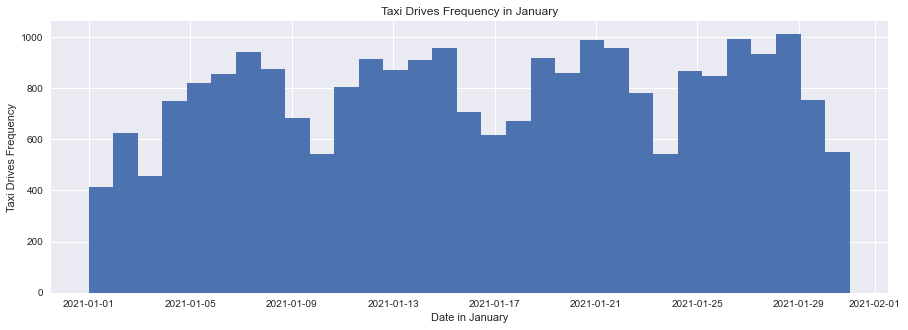

In [54]:
# Step 1 - hard code the stuff
style = 'seaborn'
graphBins = len(data['pickup_date'].unique())
with plt.style.context(style):
    fig, ax = plt.subplots(figsize=(15,5))
    plt.hist(x=data['pickup_date'], bins=graphBins)
    ax.set_xlabel('Date in January')
    ax.set_ylabel('Taxi Drives Frequency')
    ax.set_title('Taxi Drives Frequency in January')
    plt.show()

# Final Project Part 2 - Dashboard

We would continue on the previous frequency graph we made, and we would be producing more graphs as it goes. 

Lets check the data types again to make sure nothing is wrong

In [55]:
data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
pickup_date              datetime64[ns]
dtype: object

Good, seems nothing is wrong since the last part. Now lets try to shift the graph to bqplot

In [56]:
# try to shift to bqplot to produce the same graph

x_sch = bqplot.DateScale()
y_sch = bqplot.LinearScale()

# set p axis
x_axh = bqplot.Axis(scale = x_sch, label = 'Date in January')
# Adjusted the label offset so that the label would not collide
# with the data
y_axh = bqplot.Axis(scale = y_sch, 
                   orientation = 'vertical', 
                   label = 'Taxi Drives Frequency',
                   label_offset = "45px")

# (1) set up the marks
hist = bqplot.Hist(sample = data['pickup_date'],
                  normalized = False,
                  scales = {'sample':x_sch, 'count':y_sch},
                  bins=graphBins)

fig_hist = bqplot.Figure(marks=[hist], axes = [x_axh, y_axh])
# figh.layout.width = "800px"
fig_hist

Figure(axes=[Axis(label='Date in January', scale=DateScale()), Axis(label='Taxi Drives Frequency', label_offse…

So we have successfully reproduced the graph using bqplot. Now it is time to include some interactions and dashboards.

### Scatter plot of total amount and trip distance with the color axis as passenger count for the graph

Now we have the all the data we need, we could create a scatter plot on this

In [57]:
data['total_amount'].max(), data['total_amount'].min()

(267.65, 0.3)

In [58]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

#(1) set up marks
scatters = bqplot.Scatter(x = data['trip_distance'],
                          y = data['total_amount'],
                          scales = {'x': x_sc, 'y': y_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax]) 
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

Take a look at the grouped values

In [59]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

#(1) set up marks
scatters = bqplot.Scatter(x = grouped_trip_distance,
                          y = grouped_total_amount,
                          scales = {'x': x_sc, 'y': y_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax]) 
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

From the graph we can tell, our data is a bit of large so it the range is fairly big. And I haven't implement the color axis, which will be the passenger count of the dataset

Take a look at the individual values with color

In [60]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

# Add in color scale
c_sc = bqplot.ColorScale()
# color axes:
c_ax = bqplot.ColorAxis(scale = c_sc, label = 'Passenger Count', 
                       orientation = 'vertical', side = 'right')
                       # label_offset = "100px")

# set up marks
scatters = bqplot.Scatter(x = data['trip_distance'],
                          y = data['total_amount'],
                          color = data['passenger_count'],
                          scales = {'x': x_sc, 
                                    'y': y_sc,
                                    'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
# fig.layout.width = "600px"
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

Now the grouped values with color

In [61]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

# Add in color scale
c_sc = bqplot.ColorScale()
# color axes:
c_ax = bqplot.ColorAxis(scale = c_sc, label = 'Passenger Count', 
                       orientation = 'vertical', side = 'right')
                       # label_offset = "100px")

# set up marks
scatters = bqplot.Scatter(x = grouped_trip_distance,
                          y = grouped_total_amount,
                          color = grouped_passenger_count,
                          scales = {'x': x_sc, 
                                    'y': y_sc,
                                    'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
# fig.layout.width = "600px"
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

After plotting the graph, not a bad color map, but I would still like to take the log for the passenger count, as it does have a huge range in sum

In [62]:
grouped_passenger_count.min(), grouped_passenger_count.max()

(618.0, 1434.0)

Replot the graph with log10 computation on the passenger count

In [63]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

# Add in color scale
c_sc = bqplot.ColorScale()
# color axes:
c_ax = bqplot.ColorAxis(scale = c_sc, label = 'log(pass_c)', 
                       orientation = 'vertical', side = 'right')

# set up marks
scatters = bqplot.Scatter(x = grouped_trip_distance,
                          y = grouped_total_amount,
                          color = np.log10(grouped_passenger_count),
                          scales = {'x': x_sc, 
                                    'y': y_sc,
                                    'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

Well... No clear difference indicated after taking the log of the passenger count... Will remove the log in later stage

Now we will try to create the heatmap by transforming the scatter plot we have into the heatmap

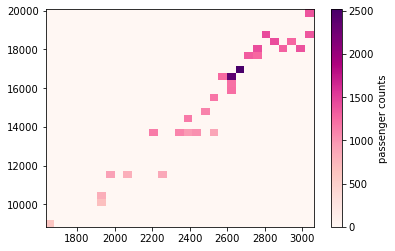

In [64]:
plt.hist2d(x=grouped_trip_distance, 
           y=grouped_total_amount, 
           weights=grouped_passenger_count, 
          bins = graphBins, 
          cmap = 'RdPu')
cb = plt.colorbar()
cb.set_label('passenger counts')

Now the individual data

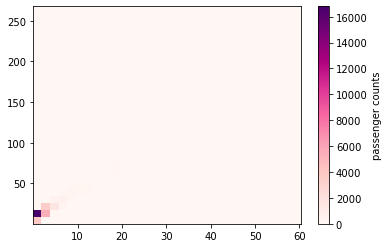

In [65]:
plt.hist2d(x=data['trip_distance'],
          y=data['total_amount'],
          weights=data['passenger_count'],
          bins=graphBins,
          cmap='RdPu')
cb = plt.colorbar()
cb.set_label('passenger counts')

Note that we did not get something good from both the graphs, as we have not rebin the graphs yet. The second graph is the reason why I choose to downsample the dataset. So that my computer would able to calculate the bins without pushing to its absolute limit. 

Take a look at the min and max of the binning

In [66]:
grouped_passenger_count.max(), grouped_passenger_count.min()

(1434.0, 618.0)

In [67]:
data['passenger_count'].min(), data['passenger_count'].max()

(1.0, 8.0)

Clearly, for the grouped one, we would need to create a log scale for the passenger count, but for the individual ones, we could also try to do that as we are binning the data into 31 entries.

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


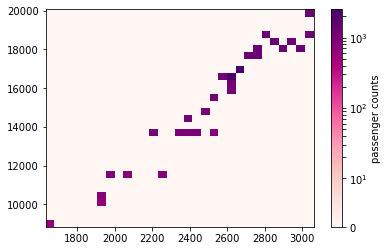

In [68]:
plt.hist2d(x=grouped_trip_distance, 
           y=grouped_total_amount, 
           weights=grouped_passenger_count, 
          bins = graphBins, 
          cmap = 'RdPu',
          norm = mpl_colors.SymLogNorm(10))
cb = plt.colorbar()
cb.set_label('passenger counts')

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


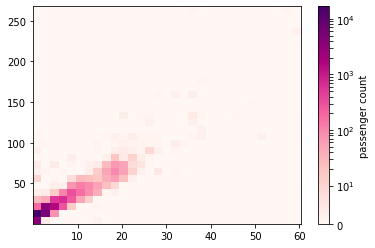

In [69]:
plt.hist2d(x=data['trip_distance'],
          y=data['total_amount'],
          weights=data['passenger_count'],
          bins = graphBins,
          cmap = 'RdPu',
          norm = mpl_colors.SymLogNorm(10))
cb = plt.colorbar()
cb.set_label('passenger count')

Great, this is much better for both the graph. We are now getting an mimic of our scatter plot on the heat map.

Now we would create the hist2d function to help us in the later stage

Grouped data:

In [70]:
ntrip_distance = 20
ntotal_payment = 20

hist2d, trip_edges, pay_edges = np.histogram2d(grouped_trip_distance,
                                              grouped_total_amount,
                                              weights=grouped_passenger_count,
                                              bins = [ntrip_distance, ntotal_payment])

hist2d[:3]

array([[618.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

Individual data:

In [71]:
ntrip_distance = 20
ntotal_payment = 20

hist2dI, trip_edges, pay_edges = np.histogram2d(data['trip_distance'],
                                              data['total_amount'],
                                              weights=data['passenger_count'],
                                              bins = [ntrip_distance, ntotal_payment])

hist2dI[:3]

array([[1.8547e+04, 9.0770e+03, 3.0000e+01, 3.0000e+00, 1.0000e+01,
        4.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [2.2000e+01, 4.2740e+03, 5.0000e+02, 1.3000e+01, 1.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 3.1400e+02, 9.7200e+02, 9.0000e+01, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

Take a look at the min and max for each hist2d array

In [72]:
hist2d.max(), hist2d.min(), hist2dI.max(), hist2dI.min()

(3637.0, 0.0, 18547.0, 0.0)

Take a quick look with imshow

Grouped data:

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


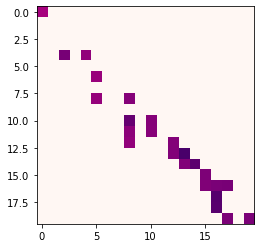

In [73]:
plt.imshow(hist2d, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))

Individual Data:

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


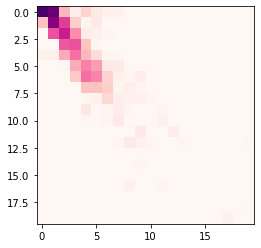

In [74]:
plt.imshow(hist2dI, cmap = 'RdPu', norm = mpl_colors.SymLogNorm(10))

So, from the graph above, we can tell that the orientation of the grouped and the individual graphs are a bit wrong. We would want them to rotate 180 degrees, which we could use the Transpose function.

Grouped Data:

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


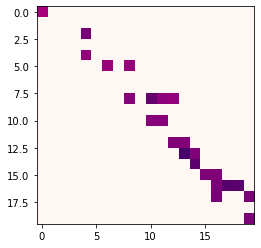

In [75]:
plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

Individual Data:

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


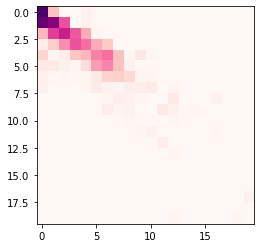

In [76]:
plt.imshow(hist2dI.T, cmap = 'RdPu', norm=mpl_colors.SymLogNorm(10))

Now we would incorporate the edges~

Grouped Data:

In [77]:
hist2d, trip_edges, pay_edges = np.histogram2d(x=grouped_trip_distance,
                                              y=grouped_total_amount,
                                              weights=grouped_passenger_count,
                                               density = True,
                                              bins = [ntrip_distance, ntotal_payment])

hist2d.max(), hist2d.min()

(2.5599438838895247e-06, 0.0)

In [78]:
hist2d.shape, trip_edges.shape, pay_edges.shape

((20, 20), (21,), (21,))

In [79]:
trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
trip_centers

array([1670.66525, 1742.03575, 1813.40625, 1884.77675, 1956.14725,
       2027.51775, 2098.88825, 2170.25875, 2241.62925, 2312.99975,
       2384.37025, 2455.74075, 2527.11125, 2598.48175, 2669.85225,
       2741.22275, 2812.59325, 2883.96375, 2955.33425, 3026.70475])

In [80]:
pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2
pay_centers

array([ 9118.53325,  9680.25975, 10241.98625, 10803.71275, 11365.43925,
       11927.16575, 12488.89225, 13050.61875, 13612.34525, 14174.07175,
       14735.79825, 15297.52475, 15859.25125, 16420.97775, 16982.70425,
       17544.43075, 18106.15725, 18667.88375, 19229.61025, 19791.33675])

In [81]:
trip_centers.min(), trip_centers.max(), pay_centers.min(), pay_centers.max()

(1670.66525, 3026.70475, 9118.53325, 19791.336750000002)

In [82]:
trip_bins = np.linspace(trip_centers.min(), trip_centers.max(), ntrip_distance + 1)
pay_bins = np.linspace(pay_centers.min(), pay_centers.max(), ntotal_payment + 1)
print(trip_bins, trip_bins.shape)
print(pay_bins, pay_bins.shape)

[1670.66525  1738.467225 1806.2692   1874.071175 1941.87315  2009.675125
 2077.4771   2145.279075 2213.08105  2280.883025 2348.685    2416.486975
 2484.28895  2552.090925 2619.8929   2687.694875 2755.49685  2823.298825
 2891.1008   2958.902775 3026.70475 ] (21,)
[ 9118.53325   9652.173425 10185.8136   10719.453775 11253.09395
 11786.734125 12320.3743   12854.014475 13387.65465  13921.294825
 14454.935    14988.575175 15522.21535  16055.855525 16589.4957
 17123.135875 17656.77605  18190.416225 18724.0564   19257.696575
 19791.33675 ] (21,)


In [83]:
hist2d, trip_edges, pay_edges = np.histogram2d(grouped_trip_distance,
                                              grouped_total_amount,
                                              weights=grouped_passenger_count,
                                              bins = [trip_bins, pay_bins])

hist2d.max(), hist2d.min()

(3637.0, 0.0)

In [84]:
trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2

In [85]:
tripmax = trip_centers.max()
tripmin = trip_centers.min()
paymax = pay_centers.max()
paymin = pay_centers.min()

In [86]:
hist2d = hist2d.T

In [87]:
hist2d.min(), hist2d.max(), hist2d[hist2d>0].min()

(0.0, 3637.0, 675.0)

In [88]:
np.log10(hist2d).min()

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf

In [89]:
hist2d[hist2d <= 0] = np.nan
hist2d = np.log10(hist2d)
hist2d[:3]

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan, 2.82930377,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan, 2.91434316,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan]])

#### Individual Data:

In [90]:
Ihist2d, Itrip_edges, Ipay_edges = np.histogram2d(x=data['trip_distance'],
                                              y=data['total_amount'],
                                              weights=data['passenger_count'],
                                               density = True,
                                              bins = [ntrip_distance, ntotal_payment])

Ihist2d.max(), Ihist2d.min()

(0.012968542283230654, 0.0)

Take a look at the shape~

In [91]:
Ihist2d.shape, Itrip_edges.shape, Ipay_edges.shape

((20, 20), (21,), (21,))

We have one excessive entry in the two edges array to match a 20 by 20 heatmap. We would need to calculate the centers from it.

In [92]:
Itrip_centers = (Itrip_edges[:-1] + Itrip_edges[1:]) / 2
Ipay_centers = (Ipay_edges[:-1] + Ipay_edges[1:]) / 2
Itrip_centers

array([ 1.5195,  4.5385,  7.5575, 10.5765, 13.5955, 16.6145, 19.6335,
       22.6525, 25.6715, 28.6905, 31.7095, 34.7285, 37.7475, 40.7665,
       43.7855, 46.8045, 49.8235, 52.8425, 55.8615, 58.8805])

In [93]:
Ipay_centers

array([  6.98375,  20.35125,  33.71875,  47.08625,  60.45375,  73.82125,
        87.18875, 100.55625, 113.92375, 127.29125, 140.65875, 154.02625,
       167.39375, 180.76125, 194.12875, 207.49625, 220.86375, 234.23125,
       247.59875, 260.96625])

We could bin the edges with the data from the centers

In [94]:
Itrip_bins = np.linspace(1.26125, 48.80875, ntrip_distance+1)
Ipay_bins = np.linspace(6.9375, 259.1625, ntotal_payment+1)
print(Itrip_bins, Itrip_bins.shape)
print(Ipay_bins, Ipay_bins.shape)

[ 1.26125   3.638625  6.016     8.393375 10.77075  13.148125 15.5255
 17.902875 20.28025  22.657625 25.035    27.412375 29.78975  32.167125
 34.5445   36.921875 39.29925  41.676625 44.054    46.431375 48.80875 ] (21,)
[  6.9375   19.54875  32.16     44.77125  57.3825   69.99375  82.605
  95.21625 107.8275  120.43875 133.05    145.66125 158.2725  170.88375
 183.495   196.10625 208.7175  221.32875 233.94    246.55125 259.1625 ] (21,)


Now, regenerate our histogram

In [95]:
Ihist2d, Itrip_edges, Ipay_edges = np.histogram2d(data['trip_distance'],
                                                 data['total_amount'],
                                                 weights=data['passenger_count'],
                                                 bins = [Itrip_bins, Ipay_bins])

Get our edges~

In [96]:
Itrip_centers = (Itrip_edges[:-1] + Itrip_edges[1:]) / 2
Ipay_centers = (Ipay_edges[:-1] + Ipay_edges[1:]) / 2

In [97]:
Itripmin = Itrip_centers.min()
Itripmax = Itrip_centers.max()
Ipaymin = Ipay_centers.min()
Ipaymax = Ipay_centers.max()

Transpose our data

In [98]:
Ihist2d = Ihist2d.T

Check the range of our plot

In [99]:
Ihist2d.min(), Ihist2d.max(), Ihist2d[Ihist2d>0].min()

(0.0, 15273.0, 1.0)

Now, this is still considered pretty big, so we would use the log for scaling

In [100]:
np.log10(Ihist2d).min()

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf

Alright, then we would convert the values smaller than 0 to nan. Then we would take the log scaling to prevent mathematical errors

In [101]:
Ihist2d[Ihist2d <= 0] = np.nan
Ihist2d = np.log10(Ihist2d)
Ihist2d[:3]

array([[4.18392435, 2.68484536, 0.        ,        nan,        nan,
        0.        ,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [3.17983893, 3.37621185, 2.8998205 , 2.00860017, 0.30103   ,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.90308999, 1.83884909, 2.5301997 , 2.64640373, 2.25767857,
        1.68124124, 0.60205999,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan]])

### Convert the binning and reshaping into a function

Great, the above was the experiment towards the data cleaning. Now we could incorporate all the above into a huge function

Grouped Data:

In [102]:
def generate_histogram_from_trip_pay(data, ntrip=20, npay=20, tripmin=tripmin, tripmax=tripmax,
                                     paymin=paymin, paymax=paymax,
                                     takeLog=True):
    trip_bins = np.linspace(tripmin, tripmax, ntrip+1)
    pay_bins = np.linspace(paymin, paymax, npay+1)
    hist2d, trip_edges, pay_edges = np.histogram2d(grouped_trip_distance,
                                                  grouped_total_amount,
                                                  weights=grouped_passenger_count,
                                                  bins = [trip_bins, pay_bins])
    hist2d = hist2d.T
    if takeLog:
        hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
        # then take log
        hist2d = np.log10(hist2d)
        trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
        pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2
    return hist2d, trip_centers, pay_centers, trip_edges, pay_edges

Individual Data:

In [103]:
def individual_generate_histogram_from_trip_pay(data, ntrip=20, npay=20,
                                               tripmin=Itripmin, tripmax=Itripmax,
                                               paymin=Ipaymin,paymax=Ipaymax,
                                                takeLog=True):
    trip_bins = np.linspace(tripmin, tripmax, ntrip+1)
    pay_bins = np.linspace(paymin, paymax, npay+1)
    hist2d, trip_edges, pay_edges = np.histogram2d(data['trip_distance'],
                                                  data['total_amount'],
                                                  weights=data['passenger_count'],
                                                  bins = [trip_bins, pay_bins])
    hist2d = hist2d.T
    if takeLog:
        hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
        # then take log
        hist2d = np.log10(hist2d)
        trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
        pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2
    return hist2d, trip_centers, pay_centers, trip_edges, pay_edges

Now we would just use the function

In [104]:
hist2d, trip_centers, pay_centers, trip_edges, pay_edges = generate_histogram_from_trip_pay(data)

In [105]:
Ihist2d, Itrip_centers, Ipay_centers, Itrip_edges, Ipay_edges = individual_generate_histogram_from_trip_pay(data)

Good, finally we can take a look at the heatmap

In [106]:
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min = np.nanmin(hist2d),
                          max = np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis
c_ax = bqplot.ColorAxis(scale=col_sc, 
                        orientation='vertical', 
                       side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

heat_map = bqplot.GridHeatMap(color = hist2d,
                             row = pay_centers,
                             column = trip_centers,
                             scales = {'color':col_sc,
                                      'row':y_sc,
                                      'column':x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity':1.0},
                             unselected_style = {'opacity':1.0})

# show the fig
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(max=3.563955464995813, min=2.829303772831025, …

In [107]:
# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(Ihist2d), 
                           max=np.nanmax(Ihist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

# (3) Marks
heat_map = bqplot.GridHeatMap(color = Ihist2d,
                              row = Ipay_centers, 
                              column = Itrip_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# (4) interactivity - none yet

# (5) put it all together in a figure
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(max=3.799547307125615, min=0.0, scheme='RdPu')…

Finally, we can build up a dashboard

In [108]:
# scales
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min = np.nanmin(hist2d),
                          max = np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis
c_ax = bqplot.ColorAxis(scale=col_sc, 
                        orientation='vertical', 
                       side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

# marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                             row = pay_centers,
                             column = trip_centers,
                             scales = {'color':col_sc,
                                      'row':y_sc,
                                      'column':x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity':1.0},
                             unselected_style = {'opacity':1.0})

# interaction:
mySelectedLabel = ipywidgets.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = hist2d[i, j]
        mySelectedLabel.value = "Passenger Count in log " + str(v)
        
heat_map.observe(get_data_value, 'selected')

# show the fig
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

In [109]:
# scales
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min = np.nanmin(Ihist2d),
                          max = np.nanmax(Ihist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis
c_ax = bqplot.ColorAxis(scale=col_sc, 
                        orientation='vertical', 
                       side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

# marks
heat_map = bqplot.GridHeatMap(color = Ihist2d,
                             row = Ipay_centers,
                             column = Itrip_centers,
                             scales = {'color':col_sc,
                                      'row':y_sc,
                                      'column':x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity':1.0},
                             unselected_style = {'opacity':1.0})

# interaction:
mySelectedLabel = ipywidgets.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = Ihist2d[i, j]
        mySelectedLabel.value = "Passenger Count in log " + str(v)
        
heat_map.observe(get_data_value, 'selected')

# show the fig
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

Below was set as a termination point on execution.

In [110]:
1 = 

SyntaxError: invalid syntax (1066469851.py, line 1)

## Scatter plot + heatmap + DashBoard

Great, now we could connect our graphs together

In [ ]:
# Create the label
mySelectedLabel = ipywidgets.Label()

### Heat Map first~

In [ ]:
# scales
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min = np.nanmin(hist2d),
                          max = np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis
c_ax = bqplot.ColorAxis(scale=col_sc, 
                        orientation='vertical', 
                       side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

# marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                             row = pay_centers,
                             column = trip_centers,
                             scales = {'color':col_sc,
                                      'row':y_sc,
                                      'column':x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity':1.0},
                             unselected_style = {'opacity':1.0})

### Then scatter plot

In [ ]:
data['pickup_date'].min(), data['pickup_date'].max()

In [ ]:
# scales
x_scl = bqplot.DateScale()
y_scl = bqplot.LogScale()

# axis
ax_xcl = bqplot.Axis(label = "Date", scale=x_scl)
ax_ycl = bqplot.Axis(label = 'Passenger Count in Log', scale = y_scl,
                    orientation = 'vertical', side = 'left')

# Start with an default data - just randomly picked one
i, j = 15, 0
trips = [trip_edges[j], trip_edges[j+1]]
pays = [pay_edges[i], pay_edges[i+1]]
pass_scatt = bqplot.Scatter(x=data['pickup_date'],
                               y=data['passenger_count'],
                               scales = {'x':x_scl, 'y':y_scl})

Define the interaction function~

In [ ]:
def get_data_value(change):
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = hist2d[i, j]
        mySelectedLabel.value = "Passenger Count " + str(v)
        trips = [trip_edges[j], trip_edges[j+1]]
        pays = [pay_edges[i], pay_edges[i+1]]
        region_mask = ((data['total_amount'] >= pays[0]) & (data['total_amount']<=pays[1]) &\
                    (data['trip_distance'] >= trips[0]) & (data['trip_distance']<=trips[1]) )
        pass_scatt = bqplot.Scatter(x=data['pickup_date'][region_mask],
                               y=data['passenger_count'][region_mask],
                               scales = {'x':x_scl, 'y':y_scl})
        
heat_map.observe(get_data_value, 'selected')

In [ ]:
region_mask = ((data['total_amount'] >= pays[0]) & (data['total_amount']<=pays[1]) &\
                    (data['trip_distance'] >= trips[0]) & (data['trip_distance']<=trips[1]) )

pays[1]

In [ ]:
# (5) create figures
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig_pass = bqplot.Figure(marks = [pass_scatt], axes = [ax_xcl, ax_ycl])

In [ ]:
fig_heatmap.layout.min_width='500px'
fig_pass.layout.min_width='500px'

myDashboard = ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([fig_heatmap,fig_pass])])
myDashboard